# Case Study on Measures of Central Tendency and Dispersion

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [47]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1. Find out how many males and females participated in the test.

In [48]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# 2. What do you think about the students' parental level of education?


In [70]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

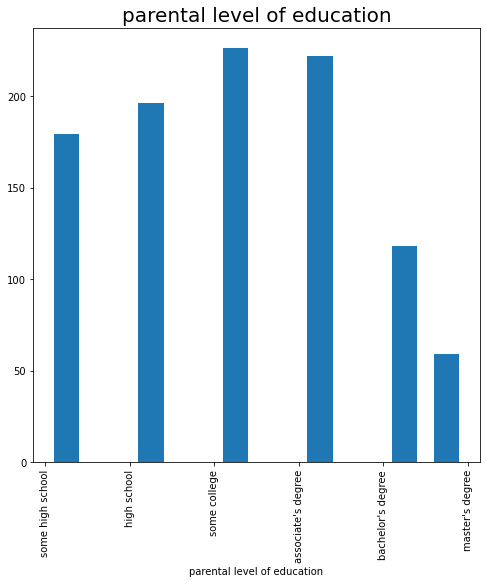

In [72]:
plt.figure(figsize=(8,8))
plt.hist(data['parental level of education'],rwidth=0.6)
plt.title("parental level of education",fontsize=20)
plt.xlabel('parental level of education',rotation=0)
plt.xticks(rotation=90)


##By analysing,most of the parents have 'some college' level of education, but 'masters degree' level of education is less.

# 3. Who scores the most on average for math, reading and writing based on

# ● Gender

In [75]:
gen=data.groupby('gender')['math score','reading score','writing score'].mean()
gen

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [77]:
gen.idxmax()

math score         male
reading score    female
writing score    female
dtype: object

# ● Test preparation course

In [78]:
test=data.groupby('test preparation course')['math score','reading score','writing score'].mean()
test

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [79]:
test.idxmax()

math score       completed
reading score    completed
writing score    completed
dtype: object

# 4. What do you think about the scoring variation for math, reading and writing based on

# ● Gender 

In [80]:
score=data.groupby('gender')['math score','reading score','writing score'].var()
score

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


##'female' have more scoring variation for math,reading and writing.which means female scores are far from the average value compared to male.

# ● Test preparation course

In [55]:
scr=data.groupby('test preparation course')['math score','reading score','writing score'].var()
scr

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


##'none'have high variance than 'completed'.'none' is far from the average value

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [157]:
# 25% of the students
t=int(1000/4)
t

250

In [159]:
top=data.sort_values('math score',ascending=False)
top_df=top.head(250)
top_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


In [129]:
#giving 5 as bonus point for top 25% students
top_df['bonus point']=5
top_df         

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus point
999,male,group E,bachelor's degree,standard,completed,100,100,100,5
996,male,group A,some college,standard,completed,100,96,86,5
515,female,group E,some college,standard,none,100,92,97,5
517,female,group E,associate's degree,standard,none,100,100,100,5
516,female,group E,bachelor's degree,standard,none,100,100,100,5
...,...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77,5
855,male,group E,associate's degree,free/reduced,completed,77,69,68,5
854,male,group D,some high school,standard,completed,77,68,69,5
853,male,group D,associate's degree,free/reduced,none,77,78,73,5


##some students get math score as 77.but they did not get bonus point because we take only top 25% students from the dataset.